## Using Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset ML/penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [6]:
df['species'].unique( )

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [10]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [14]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [15]:
df.at[336,'sex'] = 'FEMALE'

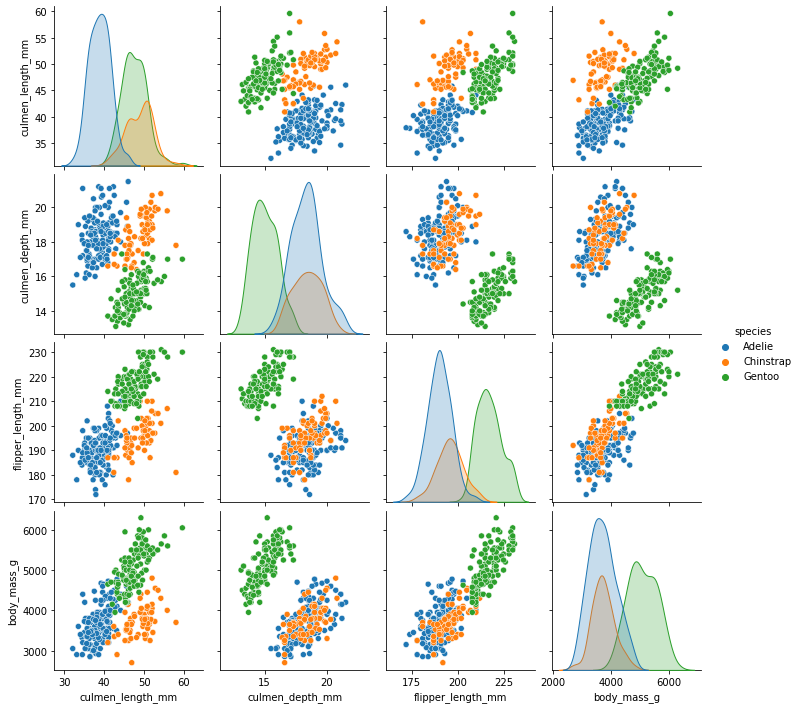

In [16]:
sns.pairplot(df,hue = 'species')

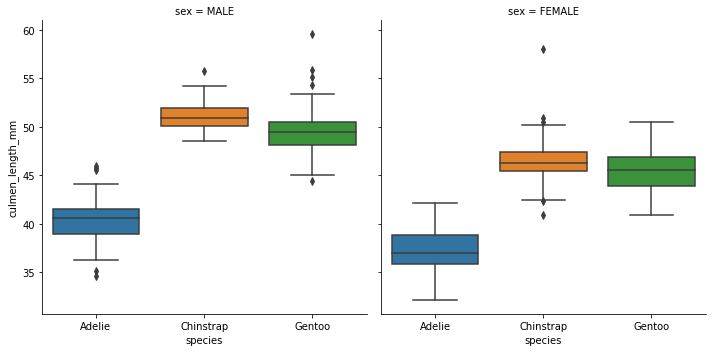

In [17]:
sns.catplot(x = 'species', y = 'culmen_length_mm', data = df, kind = 'box', col = 'sex')

In [18]:
df['island']

0      Torgersen
1      Torgersen
2      Torgersen
4      Torgersen
5      Torgersen
         ...    
338       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 334, dtype: object

In [19]:
X = pd.get_dummies(df.drop('species', axis = 1),drop_first = True)

In [20]:
y = df['species']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        53
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.99       111
   macro avg       0.99      0.98      0.99       111
weighted avg       0.99      0.99      0.99       111



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


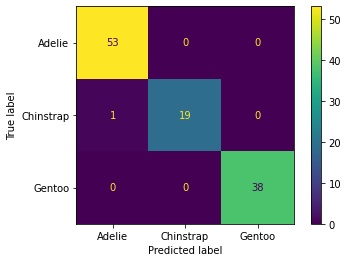

In [26]:
plot_confusion_matrix(model,X_test,y_test)

In [27]:
model.feature_importances_

array([0.34303331, 0.07901097, 0.49750577, 0.00695744, 0.03920224,
       0.        , 0.03429026])

In [28]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [29]:
pd.DataFrame(index = X.columns, data = model.feature_importances_,columns = ['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.000000
body_mass_g,0.006957
sex_MALE,0.034290
island_Dream,0.039202
culmen_depth_mm,0.079011
culmen_length_mm,0.343033
flipper_length_mm,0.497506


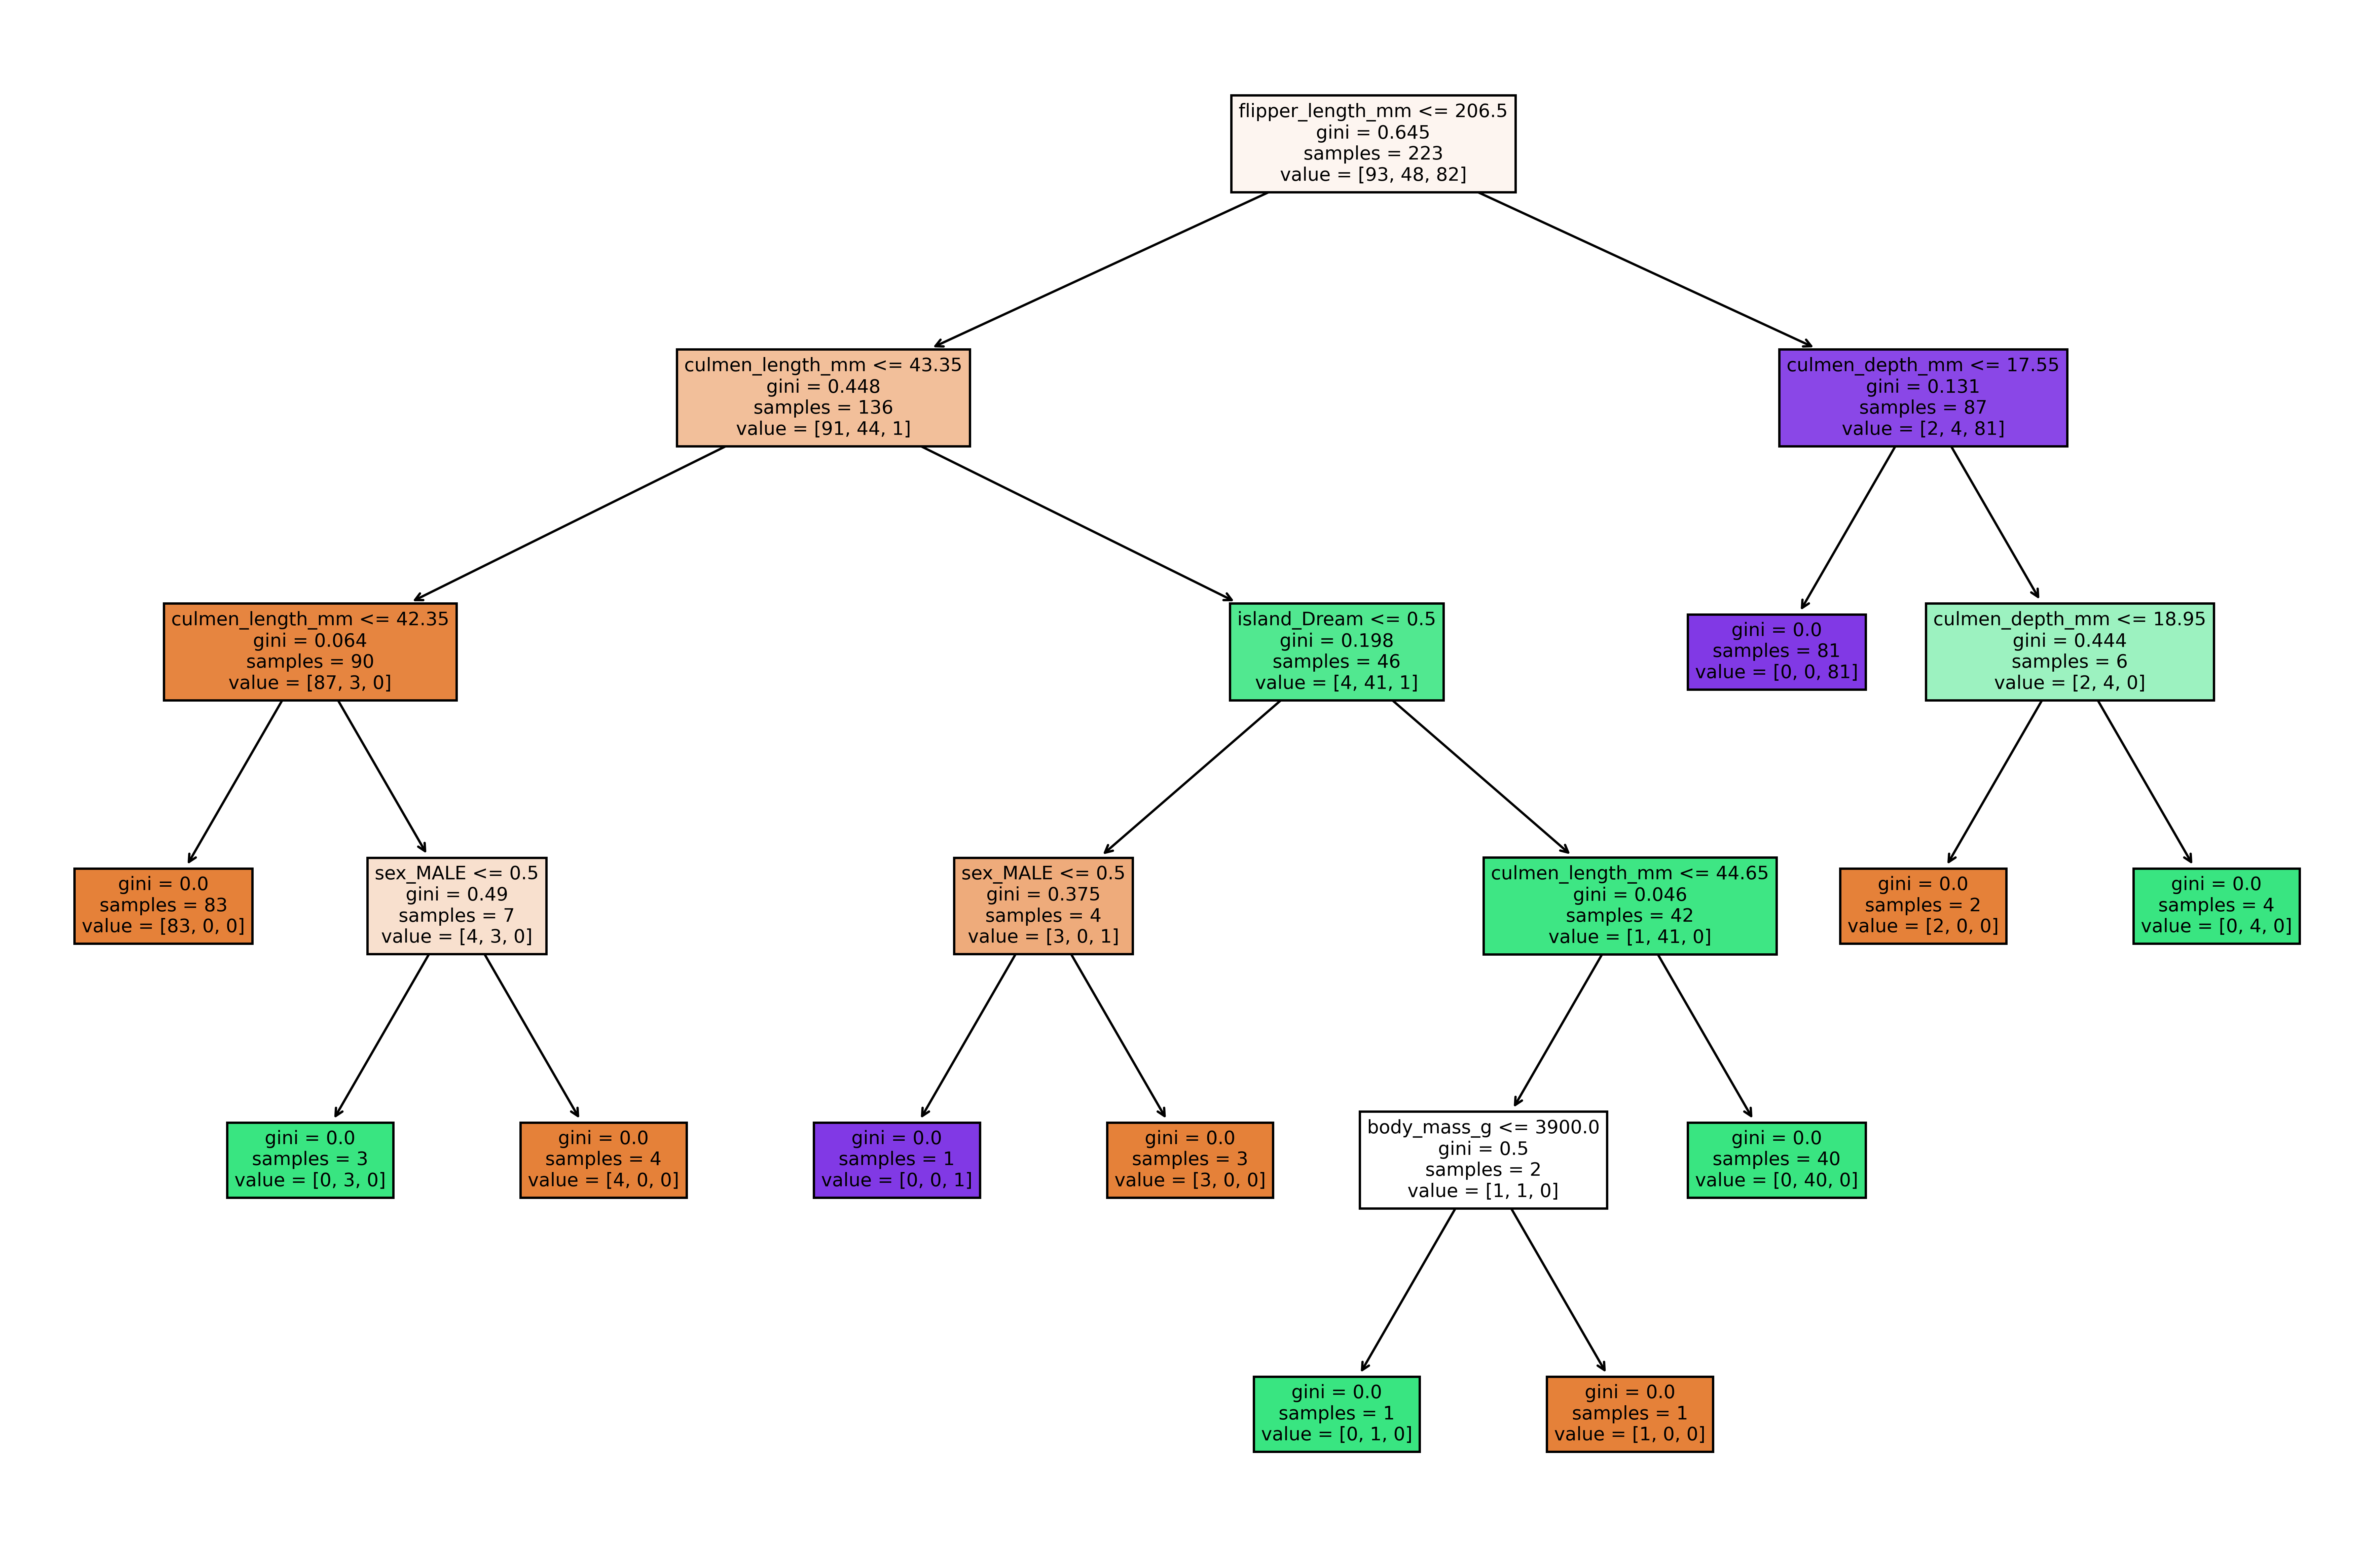

In [30]:
from sklearn.tree import plot_tree
plt.figure(figsize = (18,12),dpi = 500)
plot_tree(model,feature_names= X.columns, filled = True);

In [31]:
def report_model(model):
  model_preds = model.predict(X_test)
  print(classification_report(y_test,model_preds))
  print('\n')
  plt.figure(figsize = (12,8),dpi = 200)
  plot_tree(model,feature_names = X.columns, filled = True)

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        53
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.99       111
   macro avg       0.99      0.98      0.99       111
weighted avg       0.99      0.99      0.99       111





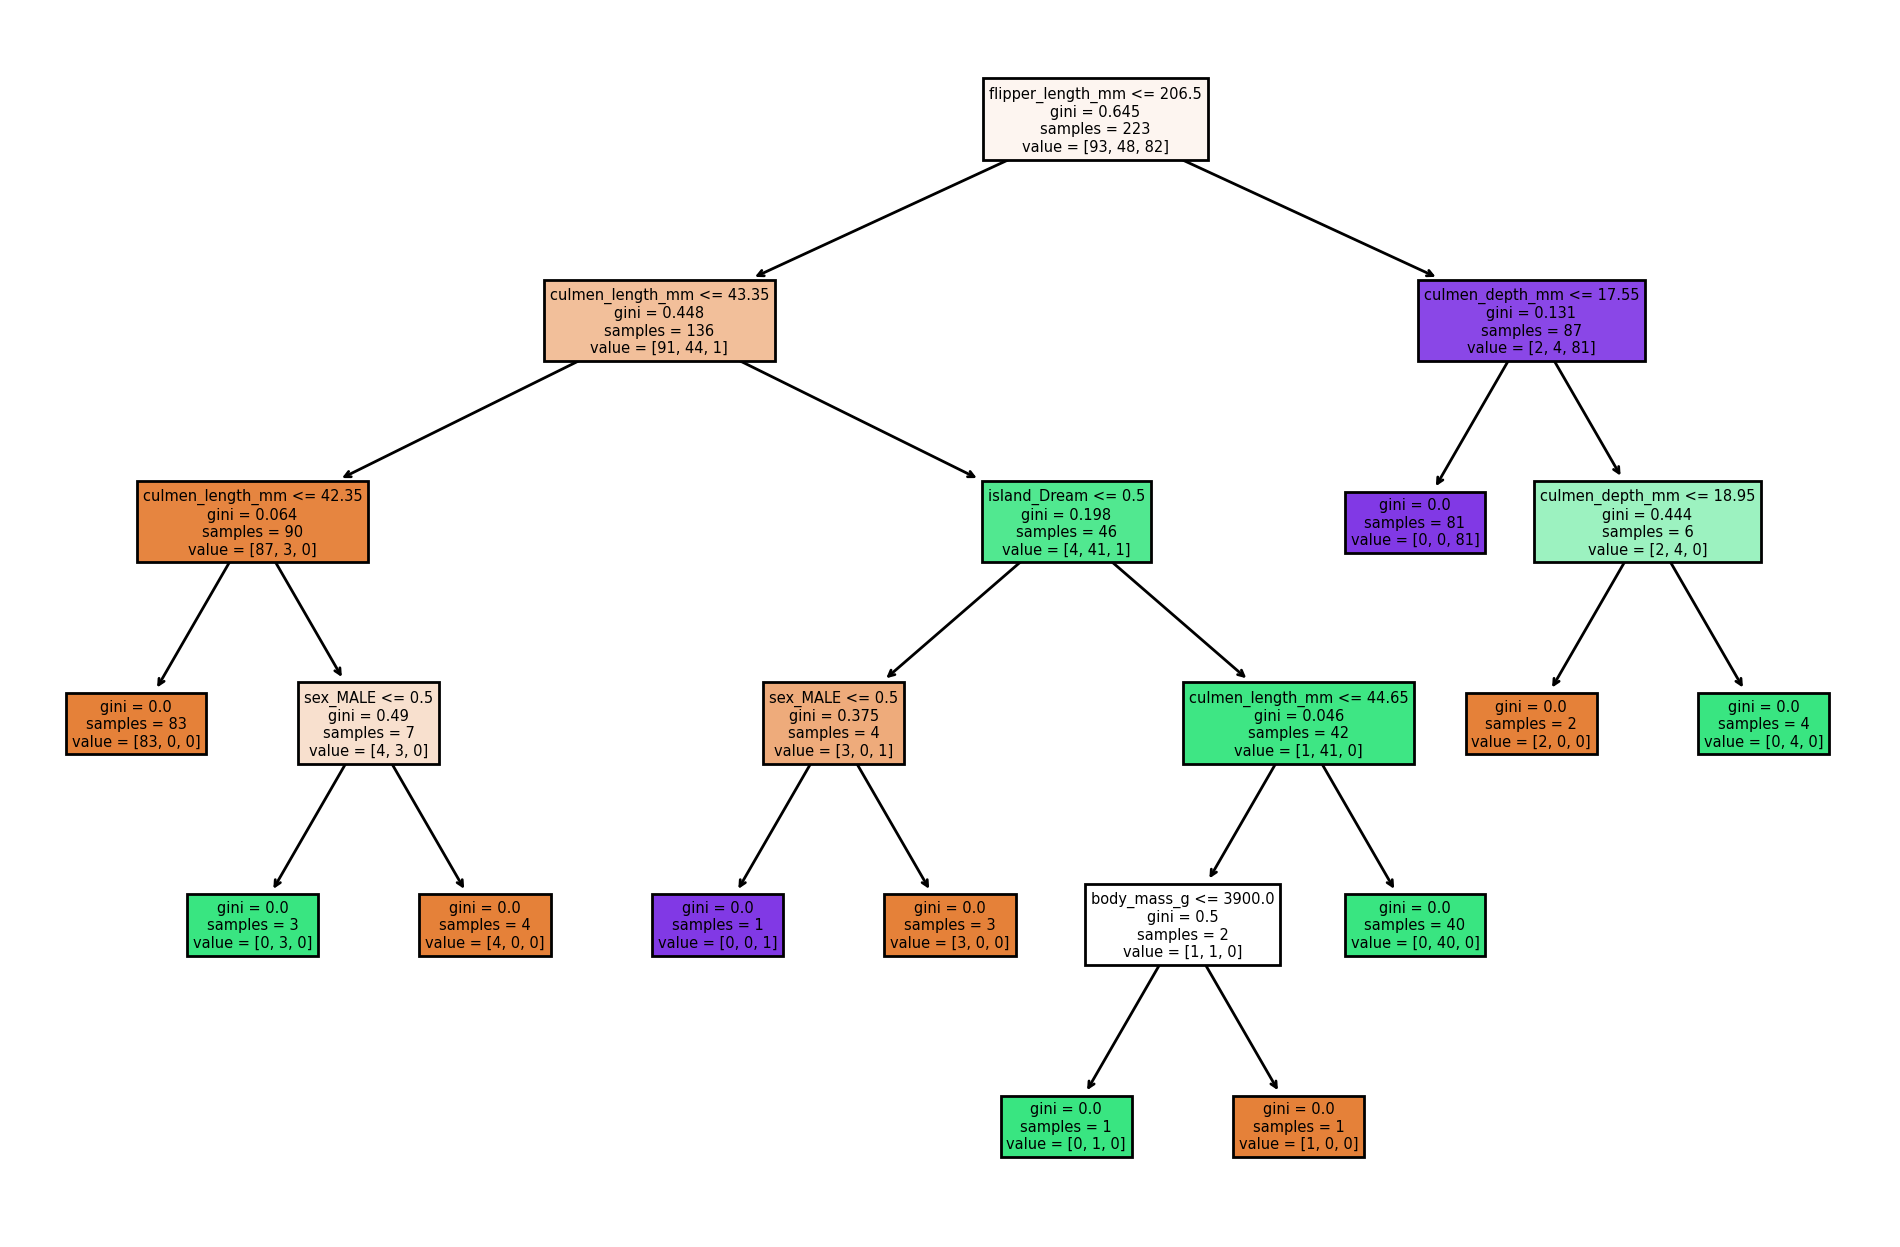

In [32]:
report_model(model)

In [33]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)

In [34]:
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        53
   Chinstrap       1.00      0.90      0.95        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.98       111
   macro avg       0.99      0.97      0.98       111
weighted avg       0.98      0.98      0.98       111





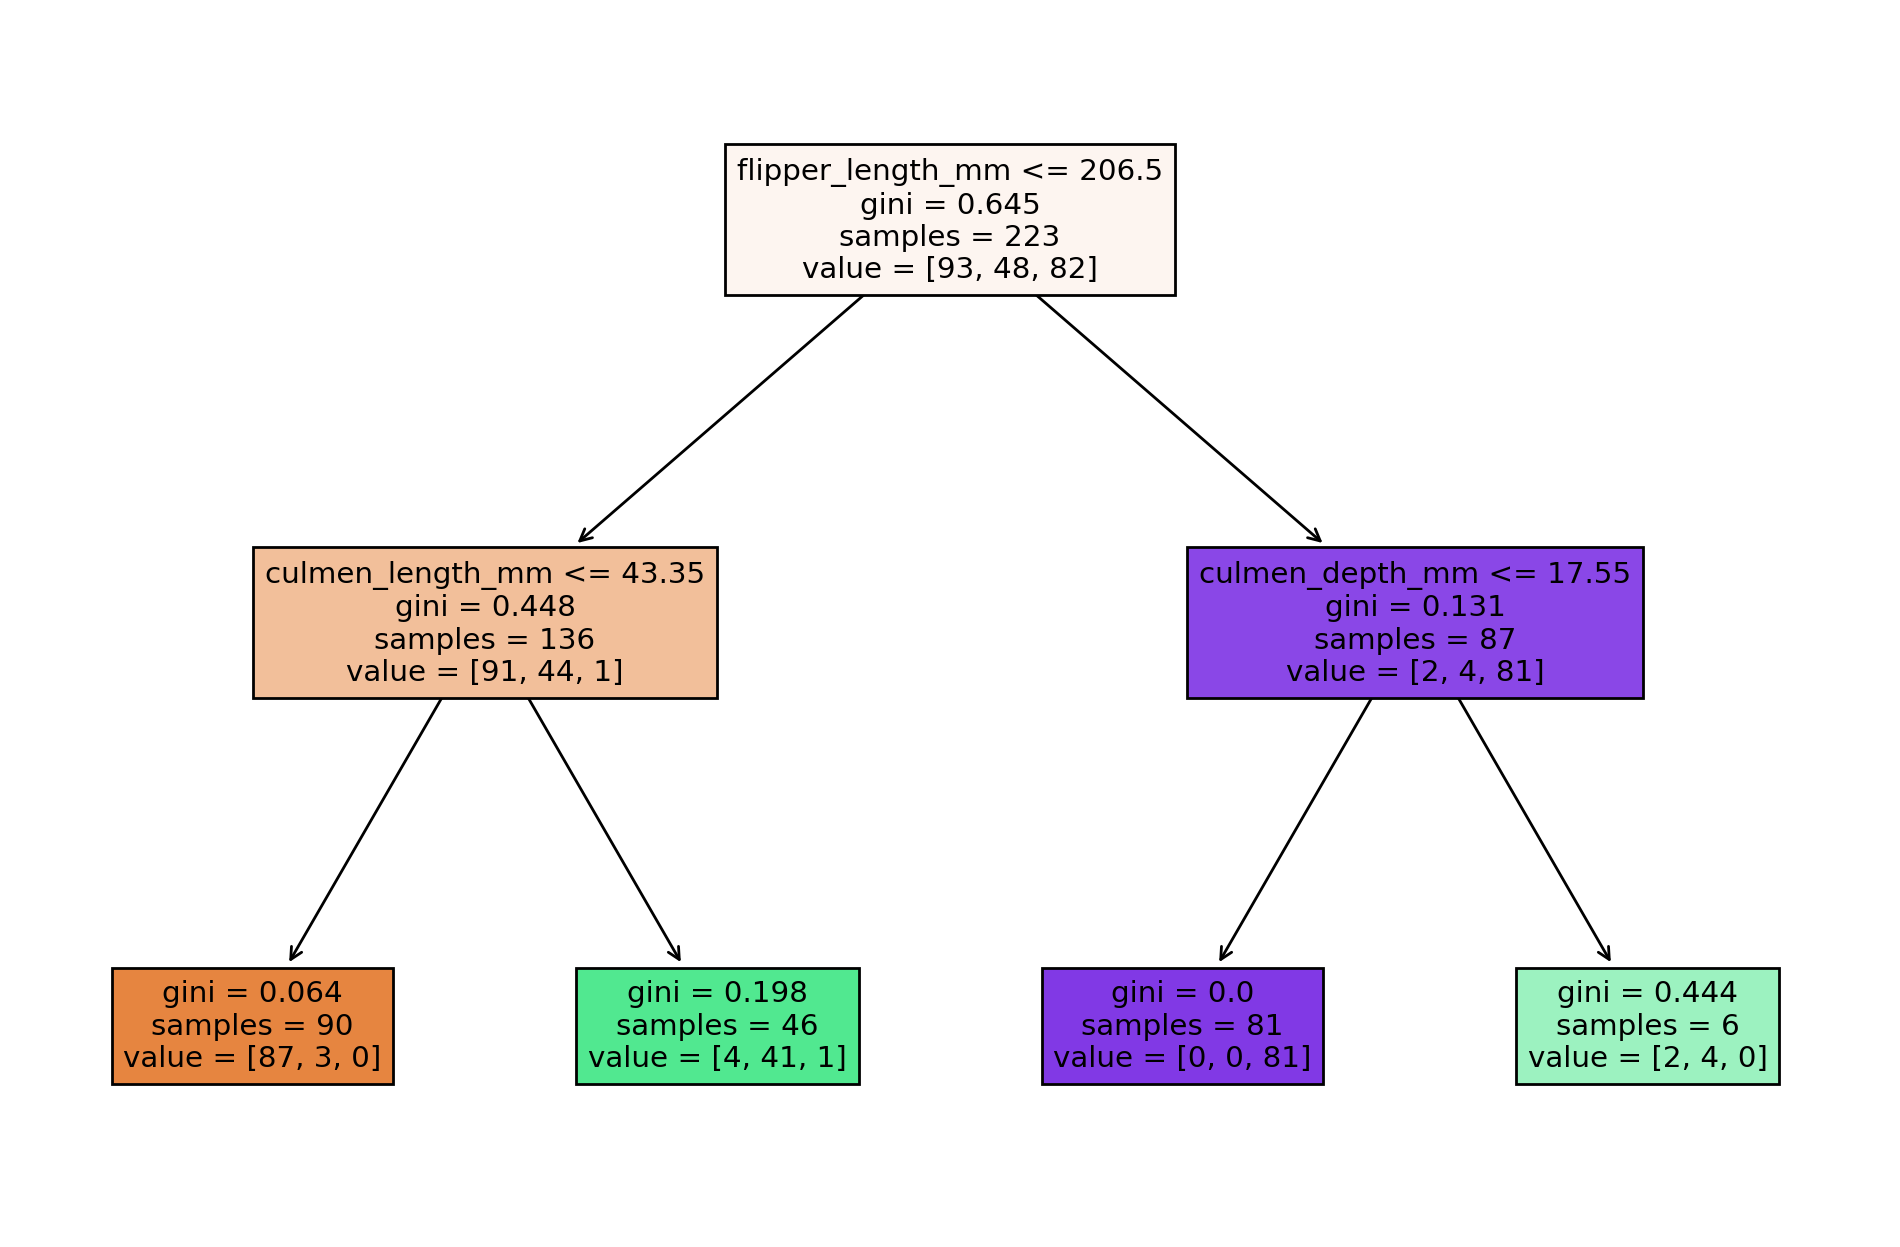

In [35]:
report_model(pruned_tree)

In [36]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)

In [37]:
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        53
   Chinstrap       1.00      0.85      0.92        20
      Gentoo       0.97      1.00      0.99        38

    accuracy                           0.97       111
   macro avg       0.98      0.95      0.96       111
weighted avg       0.97      0.97      0.97       111





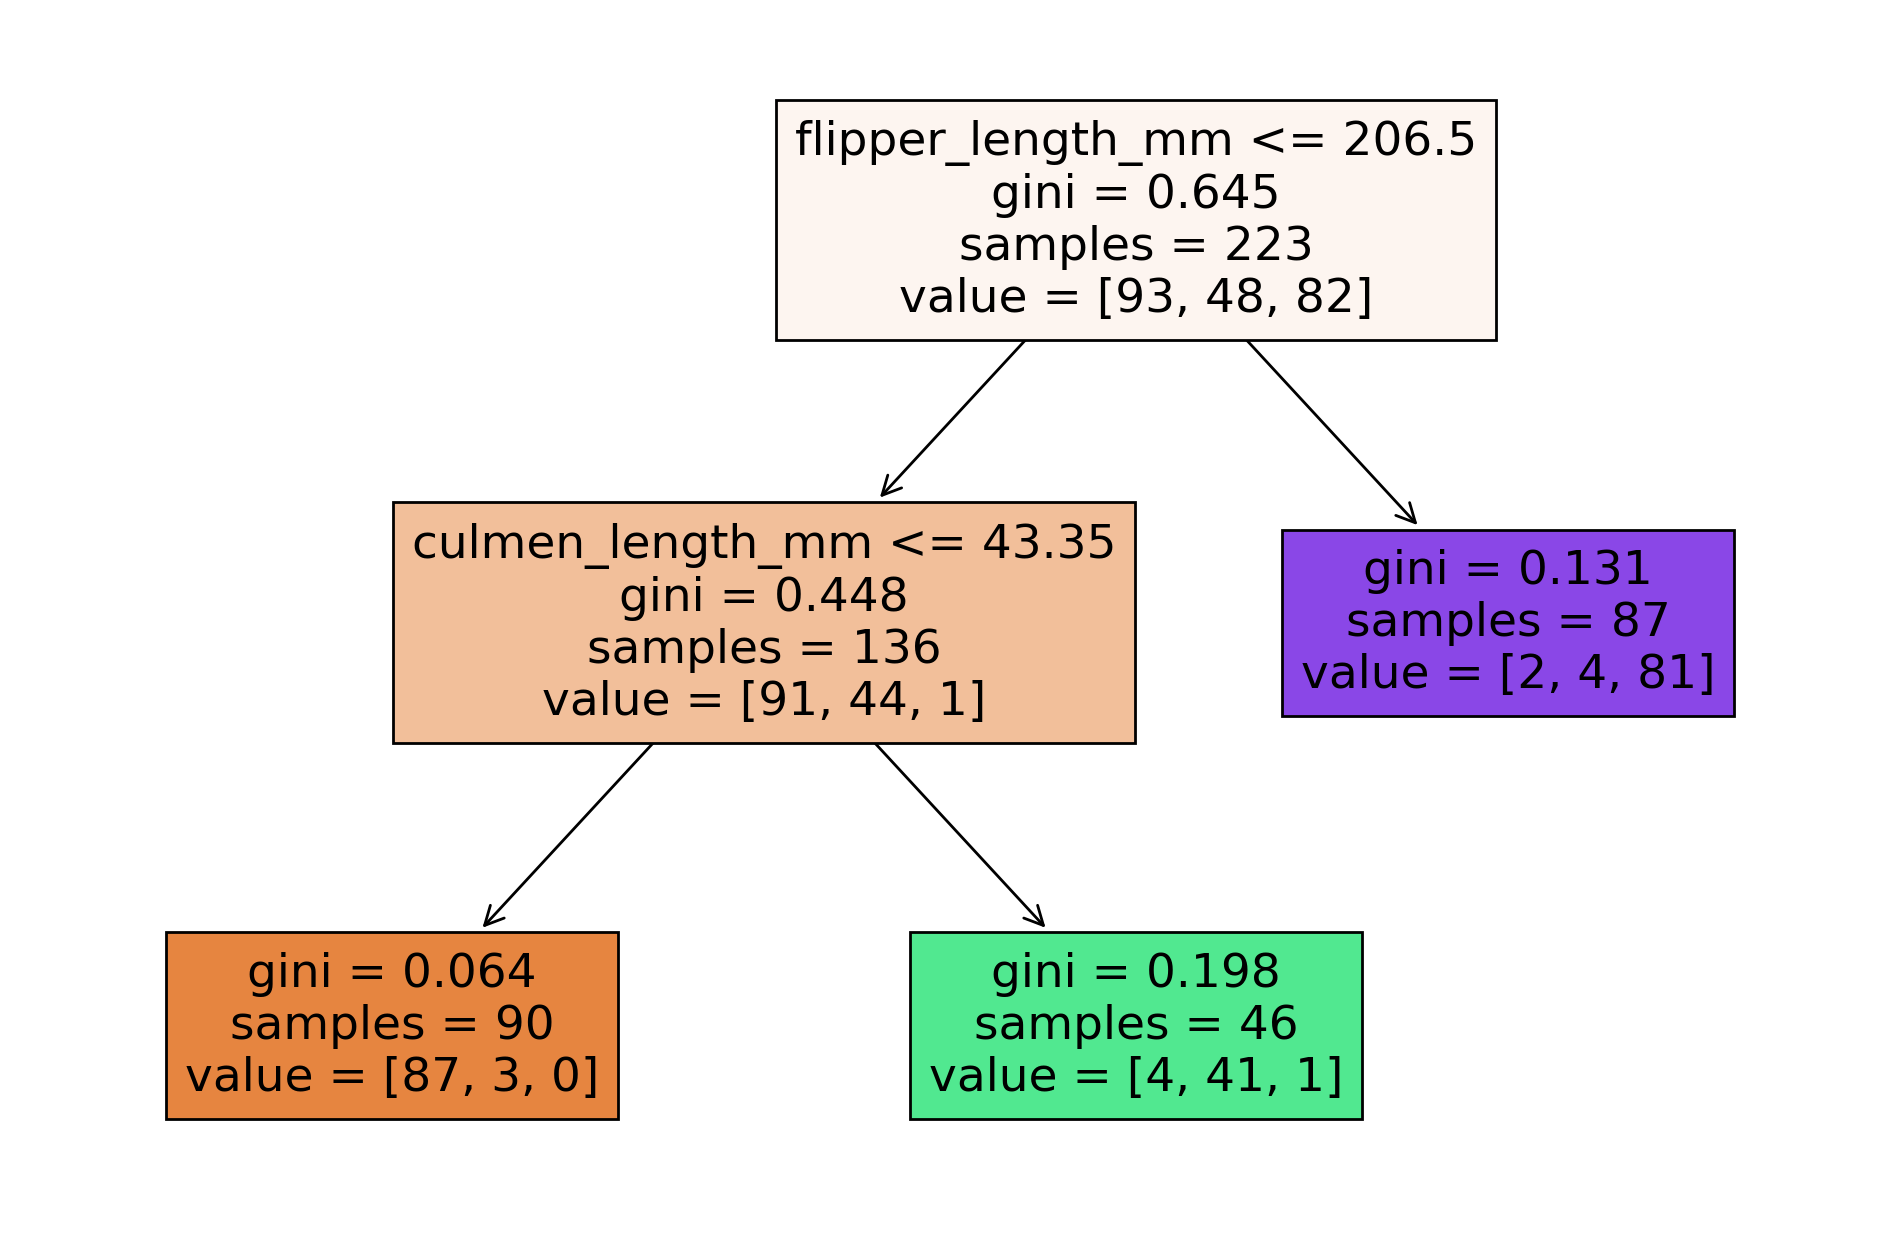

In [38]:
report_model(max_leaf_tree)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        53
   Chinstrap       0.95      0.95      0.95        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.98       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111





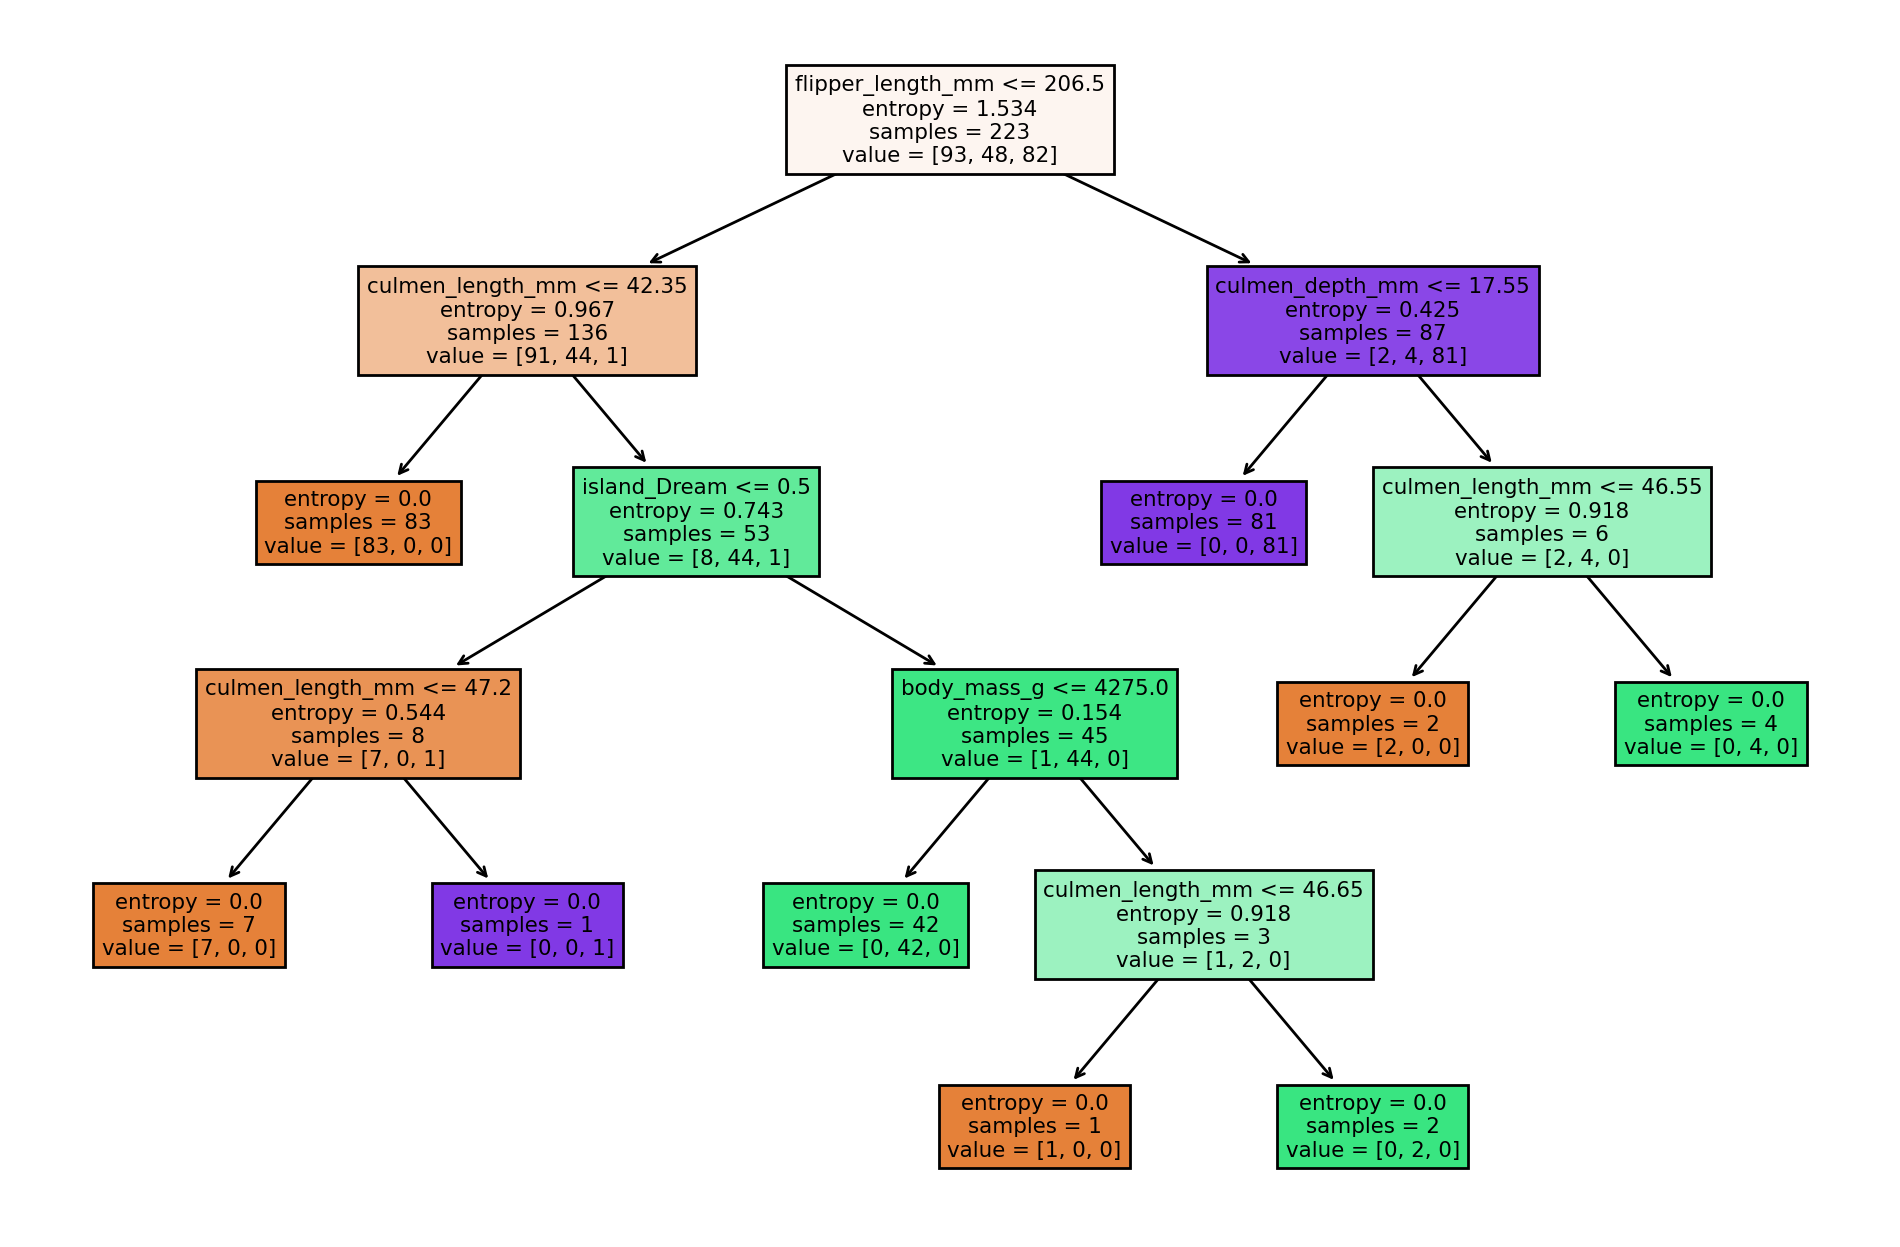

In [39]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(X_train,y_train)
report_model(entropy_tree)

## Using RandomForest

In [43]:
X_rf = pd.get_dummies(df.drop('species', axis = 1), drop_first = True)

In [44]:
y_rf = df['species']

In [45]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split( X_rf, y_rf, test_size=0.3, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators = 10,
                             max_features = 'auto', 
                             random_state = 101)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [49]:
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier(n_estimators=10, random_state=101)

In [50]:
preds_rf = rfc.predict(X_test_rf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


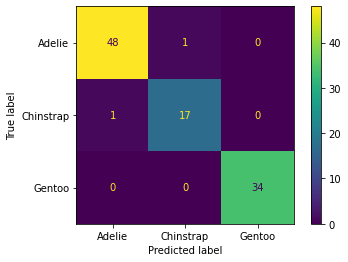

In [52]:
plot_confusion_matrix(rfc,X_test_rf,y_test_rf);

In [53]:
print(classification_report(y_test_rf, preds_rf))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        49
   Chinstrap       0.94      0.94      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       101
   macro avg       0.97      0.97      0.97       101
weighted avg       0.98      0.98      0.98       101



In [54]:
rfc.feature_importances_

array([0.35026153, 0.13384312, 0.19801501, 0.1517305 , 0.12737109,
       0.03266489, 0.00611387])